In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df=pd.read_csv("USArrests.csv", index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [4]:
df.isnull().apply(pd.value_counts)

,Murder,Assault,UrbanPop,Rape
False,50,50,50,50


<AxesSubplot:>

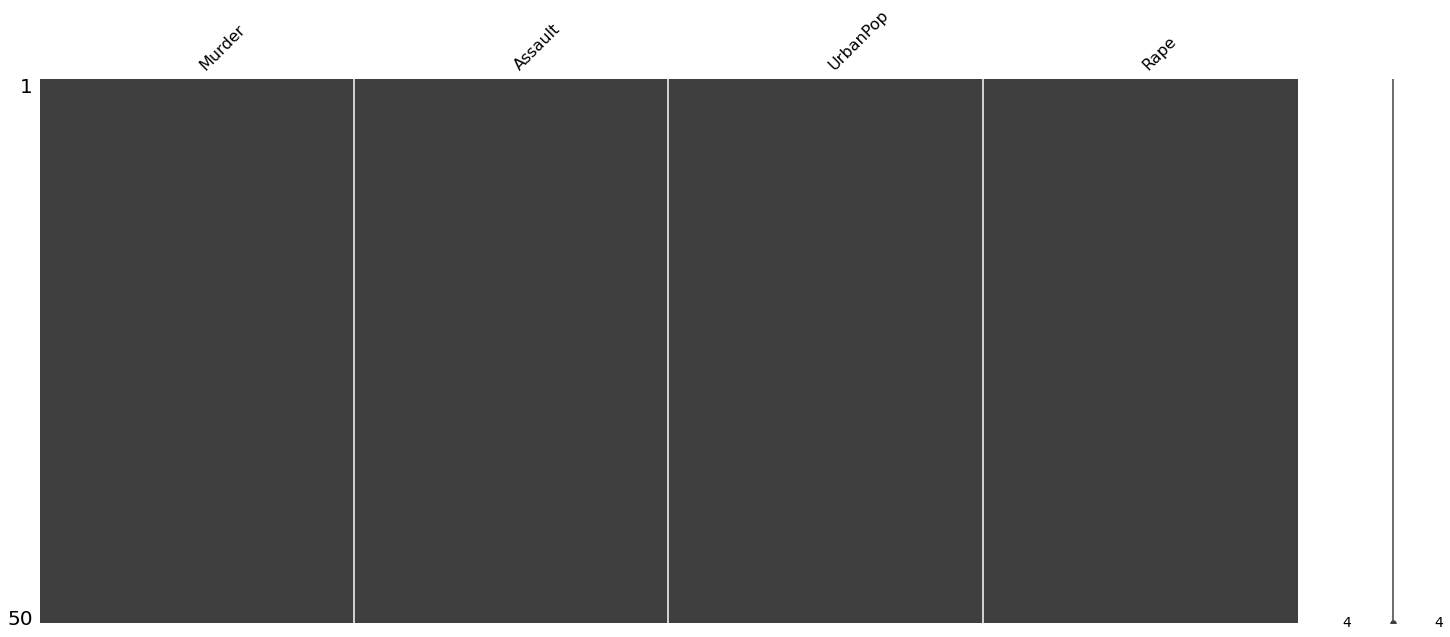

In [5]:
import missingno
missingno.matrix(df)

## Hopkins Test

In [6]:
from pyclustertend import hopkins
hopkins(df, df.shape[0])

0.4470838427099435

In [7]:
from sklearn.preprocessing import scale

In [8]:
hopkins(scale(df), df.shape[0])

0.36335913661339975

## KMeans

In [9]:
k_means=KMeans(n_clusters=2).fit(df)

In [10]:
clusters=k_means.labels_

In [11]:
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

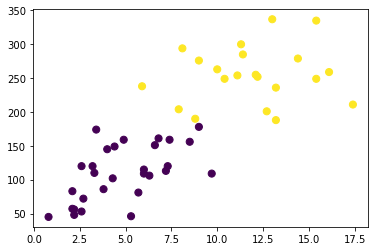

In [12]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis");

In [13]:
centroids=k_means.cluster_centers_

In [14]:
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

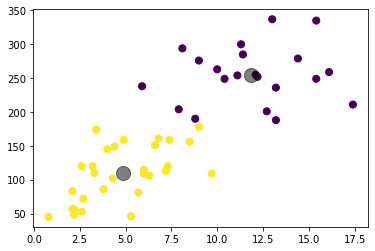

In [15]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], c = "black", s = 200, alpha=0.5);

## Elbow Method

In [16]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df))
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Inertia')

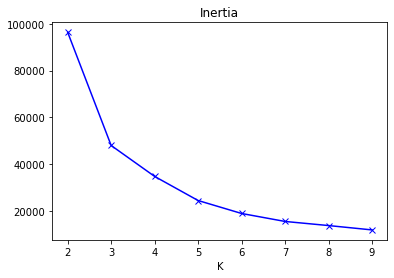

In [17]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.title("Inertia")

In [18]:
from yellowbrick.cluster import KElbowVisualizer

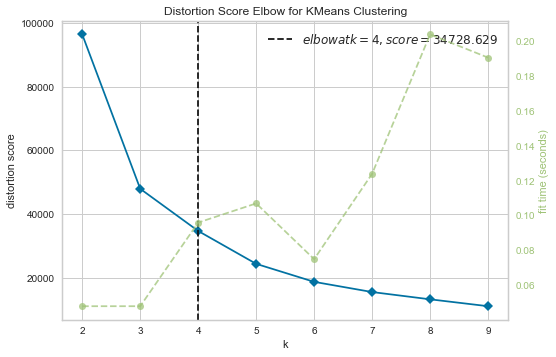

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df) #scale(df) de kullanılabilir
visu.poof()

In [20]:
kmeans=KMeans(n_clusters=4).fit(df)

In [21]:
labels=kmeans.labels_

In [22]:
df["cluster_id"]=labels

In [23]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,1


## Silhouette Score

In [24]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [25]:
print(f'Silhouette Score(n=4): {silhouette_score(df, labels)}')

Silhouette Score(n=4): 0.5017569886048432


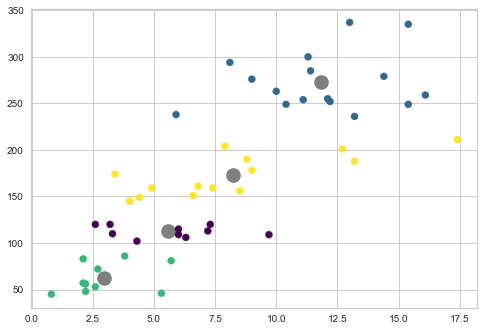

In [26]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')

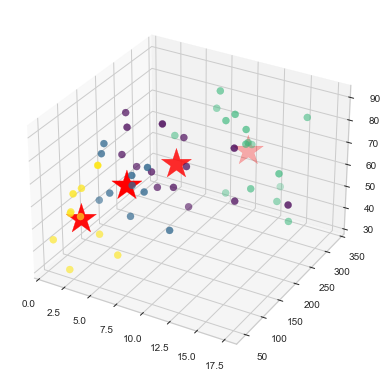

In [27]:
from mpl_toolkits.mplot3d import Axes3D
kmeans= KMeans(n_clusters=4).fit(df)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="*",s = 1000);

## ARI Score

In [28]:
new_df = df.sample(15)
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id
West Virginia,5.7,81,39,9.3,2
Pennsylvania,6.3,106,72,14.9,0
Hawaii,5.3,46,83,20.2,2
Massachusetts,4.4,149,85,16.3,3
Michigan,12.1,255,74,35.1,1
Nebraska,4.3,102,62,16.5,0
Mississippi,16.1,259,44,17.1,1
Arizona,8.1,294,80,31.0,1
Louisiana,15.4,249,66,22.2,1
Maryland,11.3,300,67,27.8,1


In [29]:
new_df["true_label"]=[3,1,1,1,3,3,1,1,3,0,1,1,3,3,1]

In [30]:
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id,true_label
West Virginia,5.7,81,39,9.3,2,3
Pennsylvania,6.3,106,72,14.9,0,1
Hawaii,5.3,46,83,20.2,2,1
Massachusetts,4.4,149,85,16.3,3,1
Michigan,12.1,255,74,35.1,1,3
Nebraska,4.3,102,62,16.5,0,3
Mississippi,16.1,259,44,17.1,1,1
Arizona,8.1,294,80,31.0,1,1
Louisiana,15.4,249,66,22.2,1,3
Maryland,11.3,300,67,27.8,1,0


In [31]:
from sklearn.metrics.cluster import adjusted_rand_score

In [32]:
adjusted_rand_score(new_df["true_label"], new_df["cluster_id"])

-0.13627254509018033

In [33]:
# the closer the score to 1 the better     ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

## Hierarchical Clustering

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [43]:
hc_complete=linkage(df, method="complete")
hc_ward=linkage(df, "ward")

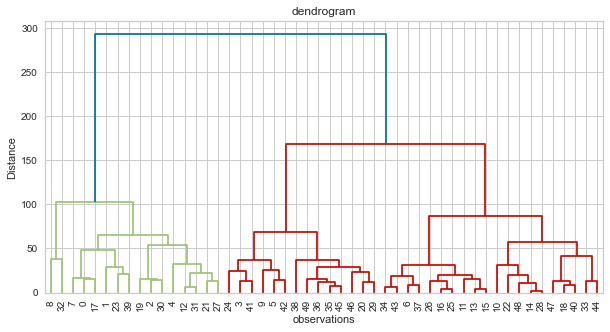

In [41]:
plt.figure(figsize=(10,5))
plt.title("dendrogram")
plt.xlabel("observations")
plt.ylabel("Distance")
dendrogram(hc_complete,
           leaf_font_size=10,)
plt.show()

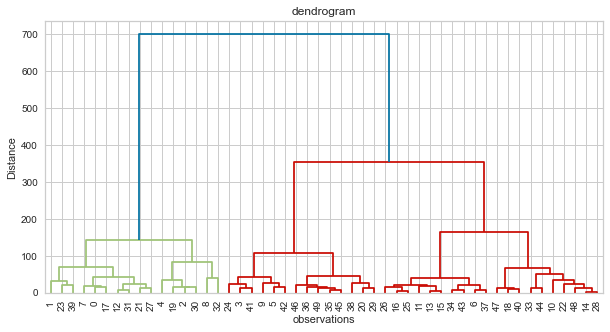

In [44]:
plt.figure(figsize=(10,5))
plt.title("dendrogram")
plt.xlabel("observations")
plt.ylabel("Distance")
dendrogram(hc_ward,
           leaf_font_size=10,)
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [58]:
cluster=AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

In [59]:
cluster.fit_predict(df)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [60]:
print(cluster.labels_)

[1 1 1 2 1 2 0 1 1 2 0 0 1 0 0 0 0 1 0 1 2 1 0 1 2 0 0 1 0 2 1 1 1 0 0 2 2
 0 2 1 0 2 2 0 0 2 2 0 0 2]


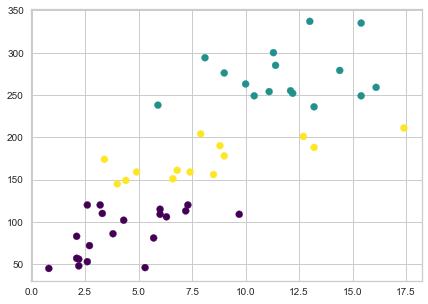

In [62]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_,  cmap = "viridis")

In [70]:
print(f'Silhouette Score(n=3): {silhouette_score(df, cluster.labels_)}')

Silhouette Score(n=3): 0.5320745032866294
